In [1]:
import sys
sys.path.append('../')

from activation import *
from loss import *
from linear import * 
from encapsulage import *
from utils import *

import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import seaborn as sns
from sklearn.metrics import confusion_matrix

def onehot(x): 
    out = [0] * 10
    out[x] = 1
    return out

In [2]:
# Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalisation
X_train /= 255
X_test /= 255

# One-hot encoding
X_train = X_train[:5000]
y_train = y_train[:5000]
X_test = X_test[:1000]
y_test = y_test[:1000]
y_train = np.array([onehot(x) for x in y_train])
y_test = np.array([onehot(x) for x in y_test])  

# Hyperparamètres
input_dim = X_train.shape[1]
hidden_dim1 = 128
hidden_dim2 = 64
output_dim = 10

batch_size = 200
epochs = 1000
gradient_step = 1e-4

# Modèle
net = Sequentiel([])
net.add_module(Linear(input_dim, hidden_dim1))
net.add_module(TanH())
net.add_module(Linear(hidden_dim1, hidden_dim2))
net.add_module(TanH())
net.add_module(Linear(hidden_dim2, output_dim))

# Perte
loss = CrossEntropyLossSoftmax()

# Entraînement
optim = Optim(net, loss, gradient_step)
lloss = optim.SGD(X_train, y_train, batch_size, epochs)


100%|██████████| 1000/1000 [02:01<00:00,  8.23it/s]


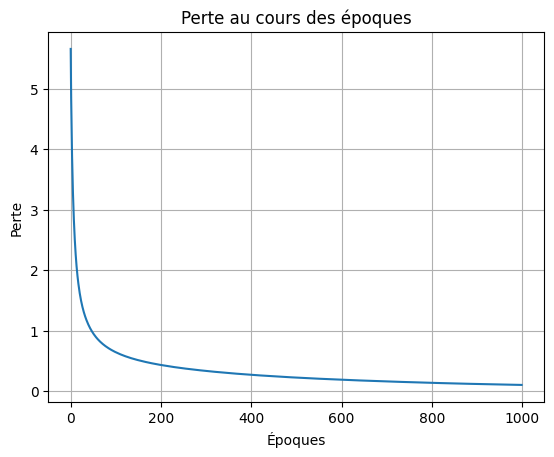

In [3]:
# Affichage de la perte
plt.figure()
plt.plot(lloss)
plt.title("Perte au cours des époques")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.grid()
plt.show()

Shape of y_hat_test: (1000, 10)
First few entries of y_hat_test: [[  1.91626687  -0.46892856   3.8119272    3.65896833  -3.57665786
    6.04201738   1.7113265    4.76605136  -1.62660074  -0.96652655]
 [  3.00430915   3.28462985  11.38275322   2.85361529  -5.74169604
    7.37291654   3.10458361 -10.36113849   3.15460305  -7.27252203]
 [-11.6766283   12.94660127   2.67773629   0.73664577  -0.49395106
   -2.7157891   -0.97785016  -3.37433945   3.84080372  -0.86627167]
 [  7.94844819  -7.52244491   1.93201404  -1.38554418  -3.40399094
    4.01031059   1.70735956  -0.18133729   4.6793408    4.21818525]
 [ -1.64040301  -1.85705413   2.39887509  -9.46450765  13.12306052
    1.06872119  -1.58682187   2.23639071   5.46498121  10.49815009]]
Shape of y_test: (1000, 10)
First few entries of y_test: [[0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
Shape of y_test_pred: (1000,)
First few entries of y_test_pred: [5 2 1 0 4]


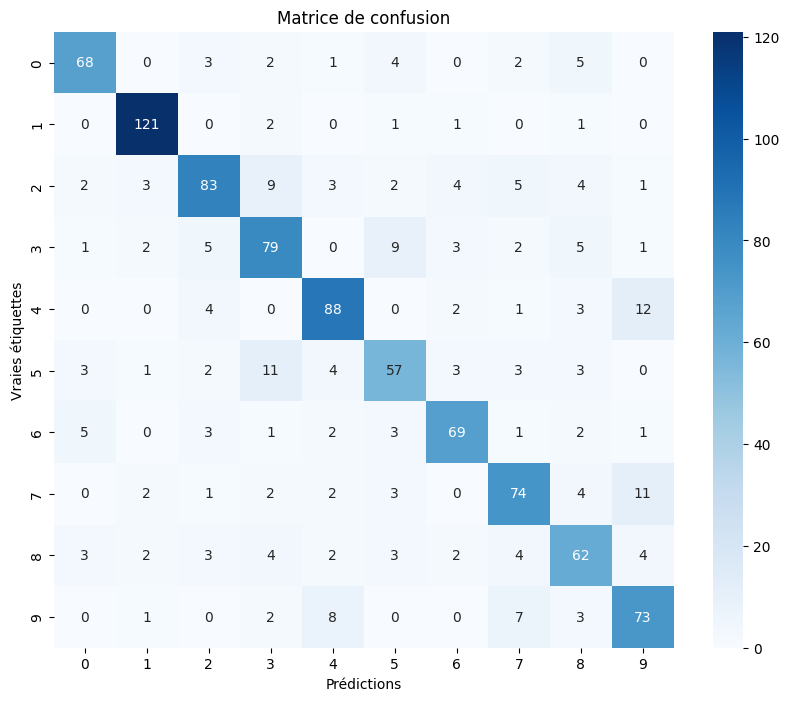

Exactitude sur le jeu de test: 77.40%


In [8]:

# Prédictions sur le jeu de test
y_hat_test = net.forward(X_test)[-1] 
print("Shape of y_hat_test:", y_hat_test.shape)  
print("First few entries of y_hat_test:", y_hat_test[:5])  

# Encodage one-hot de y_test
print("Shape of y_test:", y_test.shape)  
print("First few entries of y_test:", y_test[:5])  

# Calculer les prédictions
y_test_pred = np.argmax(y_hat_test, axis=1)
print("Shape of y_test_pred:", y_test_pred.shape)  
print("First few entries of y_test_pred:", y_test_pred[:5])  

# Créer la matrice de confusion
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')
plt.show()

# Calculer et afficher l'exactitude sur le jeu de test
test_accuracy = calculate_accuracy(y_test, y_hat_test)
print(f'Exactitude sur le jeu de test: {test_accuracy * 100:.2f}%')